## Business Case : Yulu - Hypothesis Testing 

### About Yulu 
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.
#### Problem Statement 
-   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
-   How well those variables describe the electric cycle demands

### 1. Data Cleaning & Manipulation

#### 1.1 Importing Libraries 

In [3]:
# Importing required libraries 
import pandas as pd 
import numpy as np
import scipy.stats as spy
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt

#### 1.2 Data Cleaning - check null values , duplicates and format of columns 

In [4]:
df_yulu = pd.read_csv(r"C:\Users\gladi\OneDrive\Scalar\Project\Yulu\bike_sharing.csv", delimiter= ',')
display(df_yulu.head())
display(df_yulu.info())
display(df_yulu.shape)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

(10886, 12)

In [5]:
df_yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There is no null value present in the dataset we have so we dont need to handle the null values

In [6]:
# duplicate value check 
df_yulu.duplicated().sum()

0

#### 2. Exploratory Data Analysis ( EDA ) 

#### Data type of the columns 

In [7]:
df_yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df_yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
# converting datetime column in right format 
df_yulu['datetime'] = pd.to_datetime(df_yulu['datetime'])
df_yulu.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [10]:
# Converting the categorical column data type 

df_yulu['season'] = df_yulu['season'].astype('category')
df_yulu['holiday'] = df_yulu['holiday'].astype('category')
df_yulu['workingday'] = df_yulu['workingday'].astype('category')
df_yulu['weather'] = df_yulu['weather'].astype('category')
df_yulu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [11]:
display(df_yulu['season'].unique())
display(df_yulu['holiday'].unique())
display(df_yulu['workingday'].unique())
display(df_yulu['weather'].unique())

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

[0, 1]
Categories (2, int64): [0, 1]

[0, 1]
Categories (2, int64): [0, 1]

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [12]:
# Creating new columns from datatime and converting it into categories 
df_yulu['year'] = df_yulu['datetime'].dt.year
df_yulu['month'] = df_yulu['datetime'].dt.month
df_yulu['day'] = df_yulu['datetime'].dt.day
df_yulu['hour'] = df_yulu['datetime'].dt.hour

display(df_yulu.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [13]:
# Assigning proper values for categories 

# change of season
df_yulu['season'] = df_yulu['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of holiday
df_yulu['holiday'] = df_yulu['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
df_yulu['workingday'] = df_yulu['workingday'].replace({0:'No',1:'Yes'})

# change of month
df_yulu['month'] = df_yulu['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})
df_yulu['month'] = df_yulu['month'].astype('category')

In [14]:
df_yulu.describe(include = 'category').transpose()

,count,unique,top,freq
season,10886,4,Winter,2734
holiday,10886,2,No,10575
workingday,10886,2,Yes,7412
weather,10886,4,1,7192
month,10886,12,August,912


#### Univariate Analysis 

In [15]:
# Time Span of the data 
time_span = df_yulu['datetime'].max() - df_yulu['datetime'].min()
time_span

Timedelta('718 days 23:00:00')

In [16]:
df_yulu.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [17]:
df_yulu['season'].value_counts()

season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64

In [18]:
df_yulu['holiday'].value_counts()

holiday
No     10575
Yes      311
Name: count, dtype: int64

In [19]:
df_yulu['workingday'].value_counts()

workingday
Yes    7412
No     3474
Name: count, dtype: int64

In [20]:
df_yulu['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [21]:
# year counts
df_yulu['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

In [22]:
# year counts
df_yulu['month'].value_counts()

month
August       912
December     912
July         912
June         912
May          912
November     911
October      911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64

In [23]:
df_yulu['day'].value_counts()

day
1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: count, dtype: int64

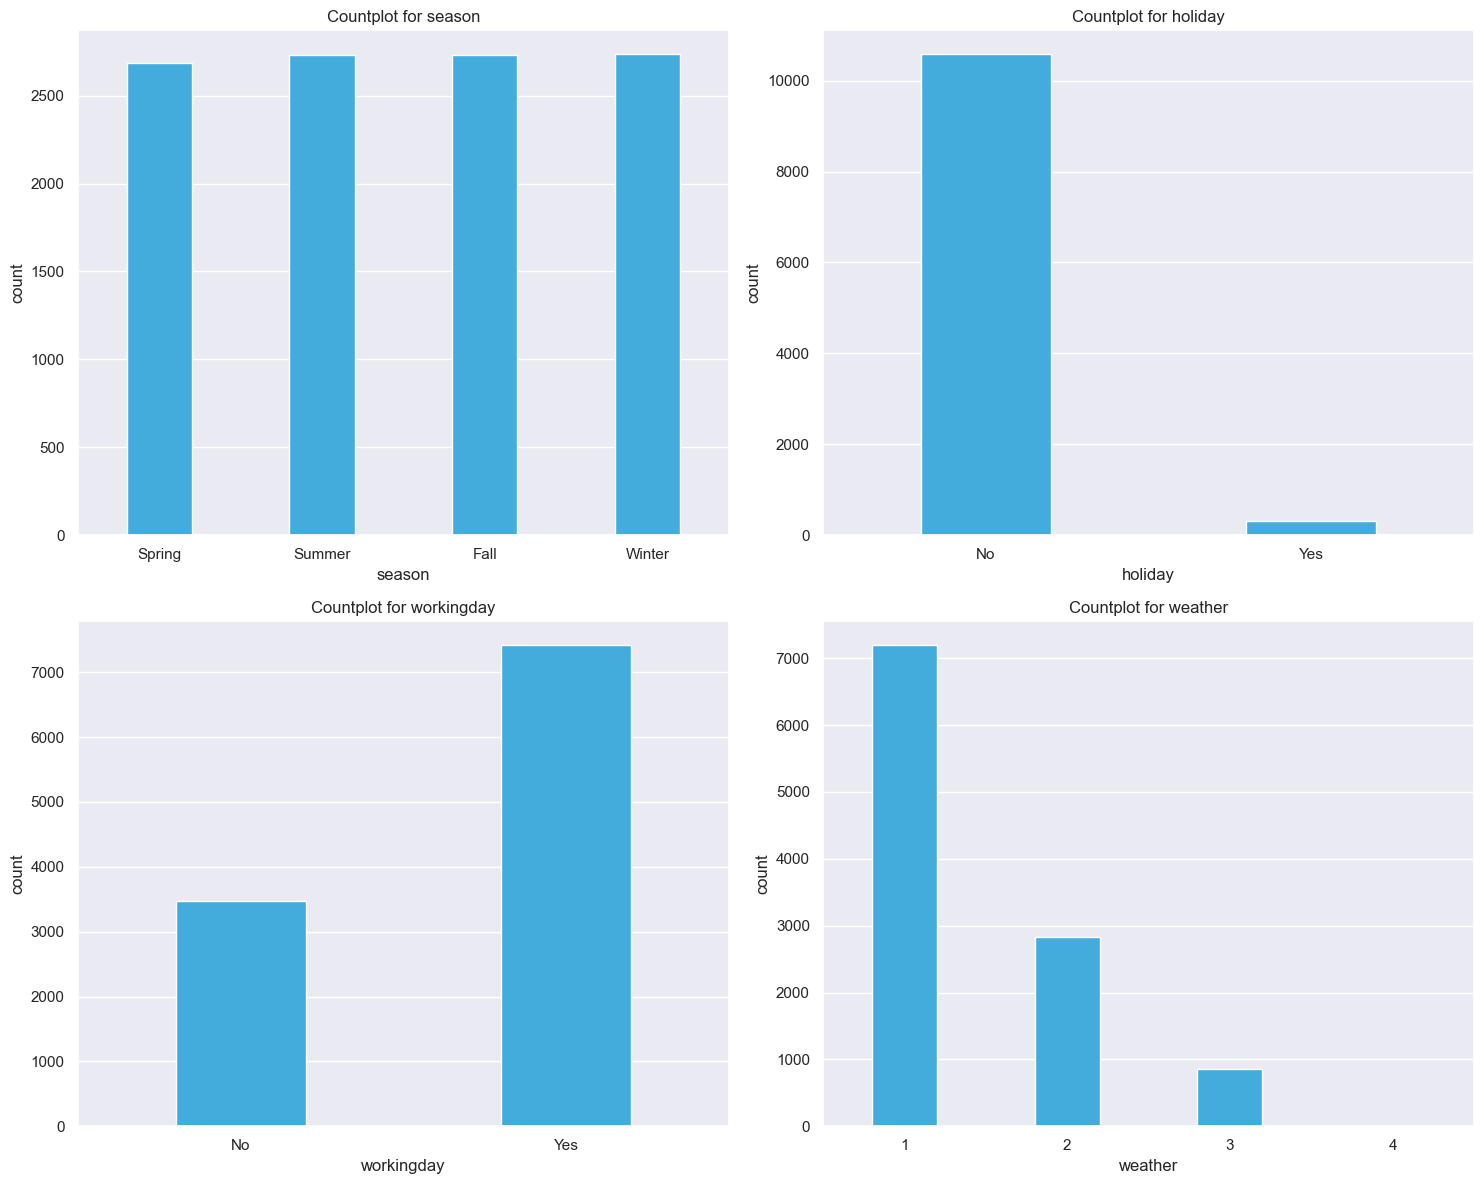

In [24]:
cat_col = ['season', 'holiday', 'workingday', 'weather']
plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df_yulu, color="#29B6F6", width=0.4)
    plt.title(f'Countplot for {column}')
    
plt.tight_layout()
plt.show()

In [25]:
def hist_box(column):
    f,axs = plt.subplots(1,2,figsize=(10,5))
    sns.set(style ='darkgrid')

    plt.subplot(1,2,1)
    sns.histplot(df_yulu[column],bins=20,kde=True)
    plt.title(f'Histogram for {column}')

    plt.subplot(1,2,2)
    sns.boxplot(df_yulu[column])
    plt.title(f'Boxplot for {column}')

    tabular_data = df_yulu[column].describe().reset_index()
    tabular_data.columns = ['Statistics','Value']
    display(tabular_data)

    plt.tight_layout()
    plt.show()

,Statistics,Value
0,count,10886.00000
1,mean,20.23086
2,std,7.79159
3,min,0.82000
4,25%,13.94000
5,50%,20.50000
6,75%,26.24000
7,max,41.00000


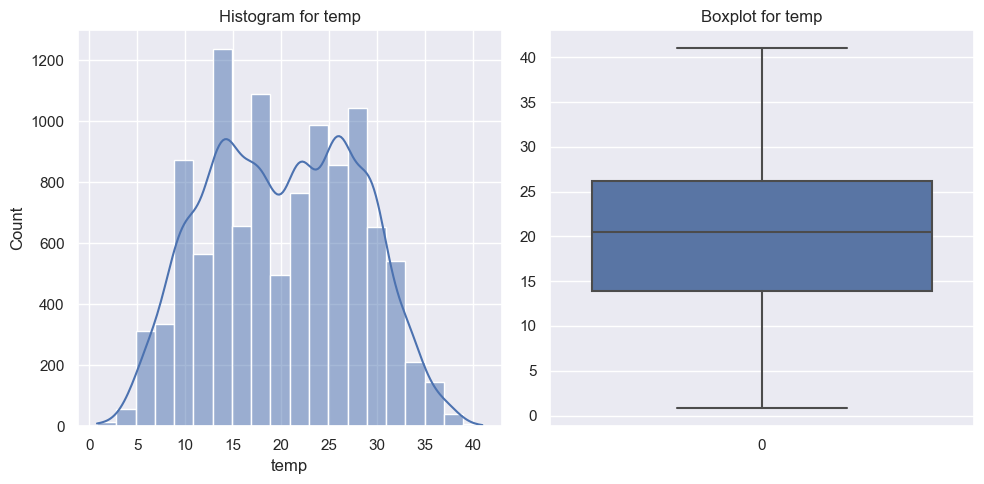

,Statistics,Value
0,count,10886.000000
1,mean,23.655084
2,std,8.474601
3,min,0.760000
4,25%,16.665000
5,50%,24.240000
6,75%,31.060000
7,max,45.455000


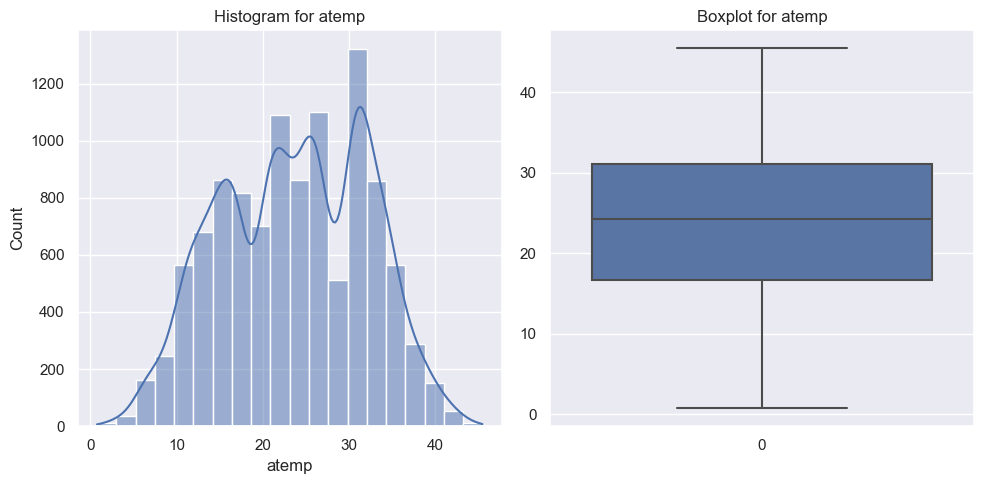

,Statistics,Value
0,count,10886.000000
1,mean,61.886460
2,std,19.245033
3,min,0.000000
4,25%,47.000000
5,50%,62.000000
6,75%,77.000000
7,max,100.000000


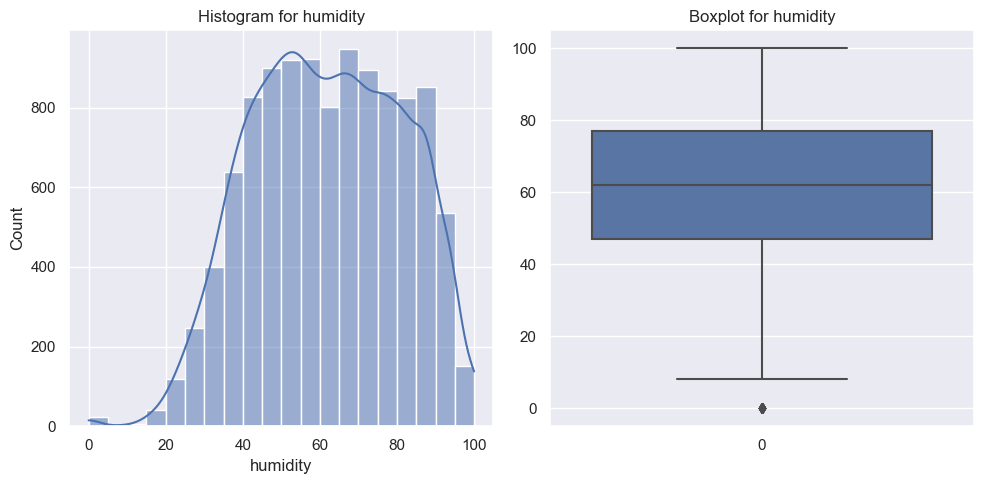

,Statistics,Value
0,count,10886.000000
1,mean,12.799395
2,std,8.164537
3,min,0.000000
4,25%,7.001500
5,50%,12.998000
6,75%,16.997900
7,max,56.996900


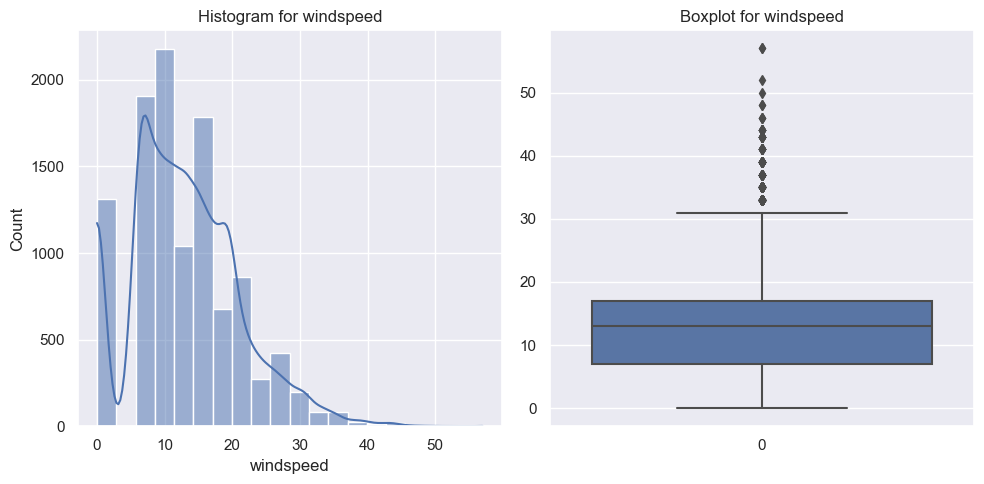

,Statistics,Value
0,count,10886.000000
1,mean,36.021955
2,std,49.960477
3,min,0.000000
4,25%,4.000000
5,50%,17.000000
6,75%,49.000000
7,max,367.000000


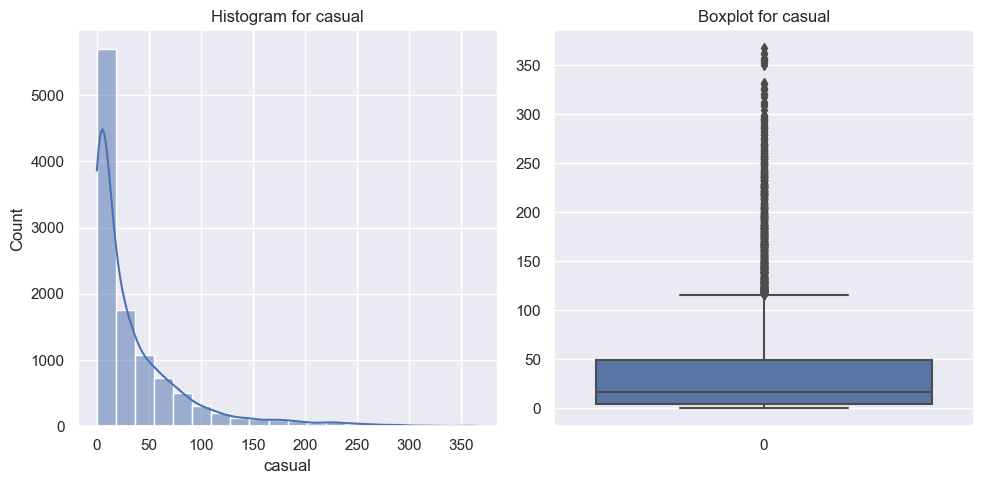

,Statistics,Value
0,count,10886.000000
1,mean,155.552177
2,std,151.039033
3,min,0.000000
4,25%,36.000000
5,50%,118.000000
6,75%,222.000000
7,max,886.000000


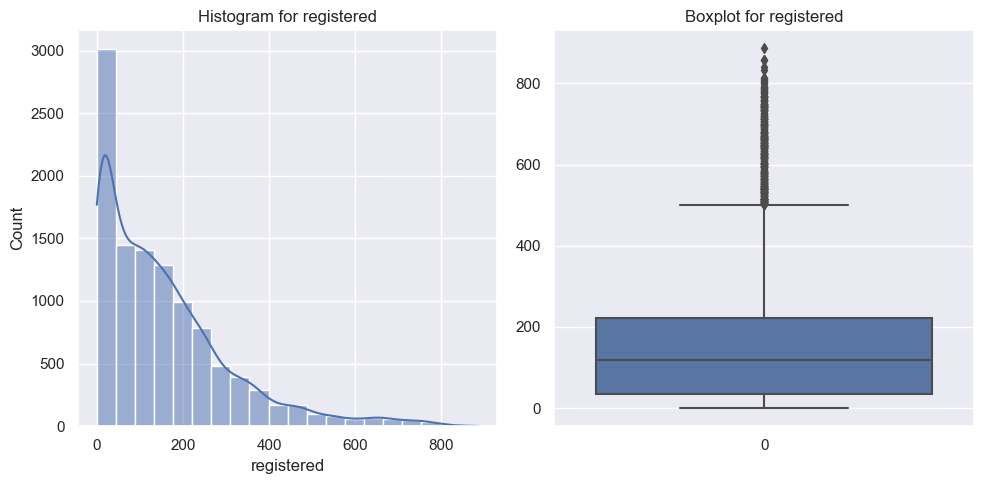

,Statistics,Value
0,count,10886.000000
1,mean,191.574132
2,std,181.144454
3,min,1.000000
4,25%,42.000000
5,50%,145.000000
6,75%,284.000000
7,max,977.000000


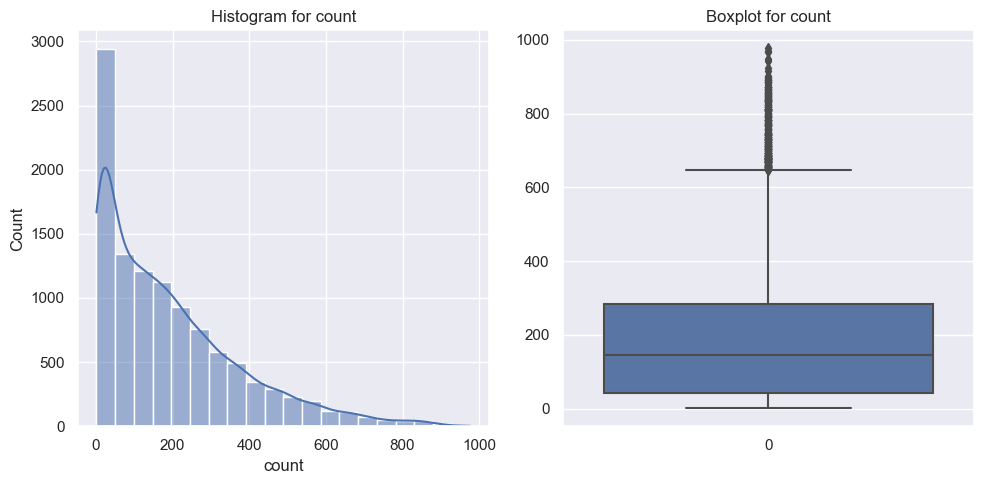

In [26]:
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for column in num_col:
    hist_box(column)

Numerical column analysis

Temp:

The 'temp' column shows a diverse temperature range (0.82 to 41.0), with a median of 20.5 and moderate variability around the mean of approximately 20.23 degrees Celsius.

Atemp:

The 'atemp' column displays a wide range of apparent temperatures (0.76 to 45.455), with a mean of approximately 23.66 and moderate variability around the median of 24.24.

Humidity:

The 'humidity' column depicts a range of humidity values (0 to 100), with an average around 61.89. The distribution shows moderate variability, from 47 at the 25th percentile to 77 at the 75th percentile, indicating diverse humidity levels in the dataset.

WindSpeed:

The 'windspeed' column displays a range of wind speeds from 0 to 56.9979, with a mean of approximately 12.80.

Casual:

The 'casual' column demonstrates a broad range of casual bike rental counts, with values spanning from 0 to 367. The distribution is positively skewed, as indicated by the mean (36.02) being less than the median (17.0).

Registered:

The 'registered' column showcases a diverse range of registered bike rental counts, ranging from 0 to 886. The distribution is positively skewed, evidenced by the mean (155.55) being less than the median (118.0).

Count:

The 'count' column reveals a wide range of total bike rental counts, varying from 1 to 977. The distribution is positively skewed, with a mean (191.57) greater than the median (145.0), indicating a concentration of lower values

#### Bivariate Analysis

In [27]:
cat_col

['season', 'holiday', 'workingday', 'weather']

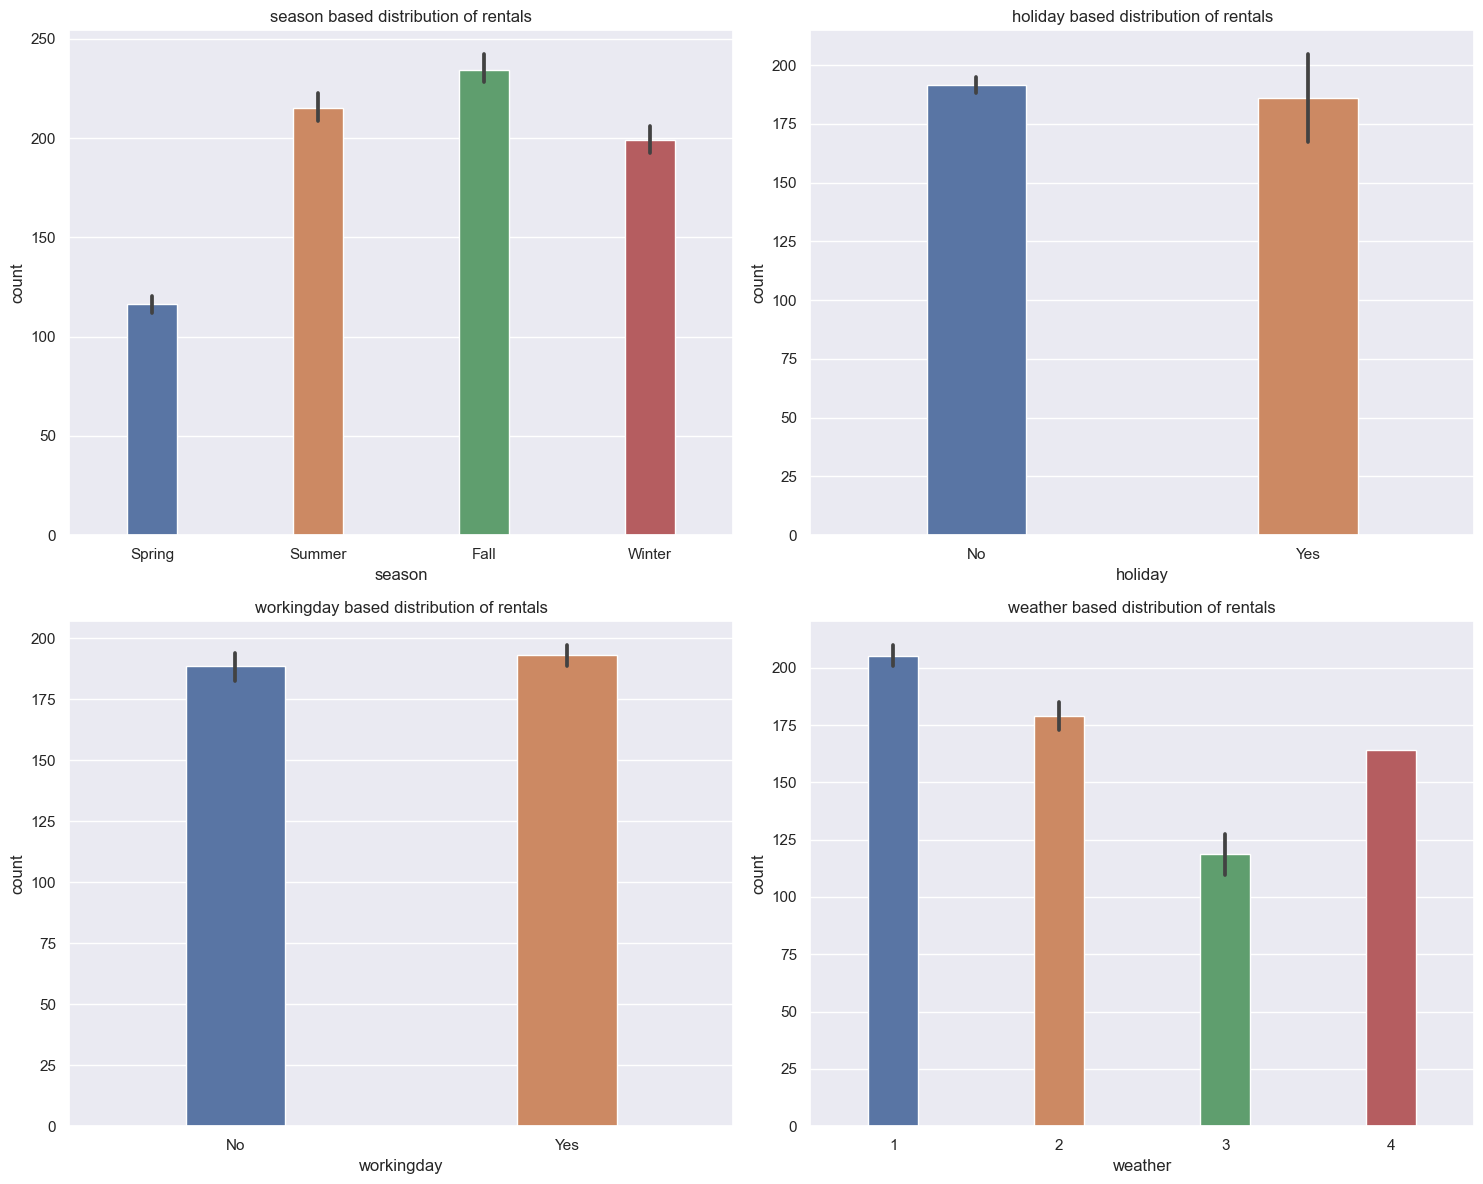

In [28]:
plt.figure(figsize=(15,12))
sns.set(style='darkgrid')

for i, column in enumerate(cat_col,1):
    plt.subplot(2,2,i)
    sns.barplot(x=column,y='count',data=df_yulu,width=0.3)
    plt.title(f'{column} based distribution of rentals')

plt.tight_layout()
plt.show()

In [29]:
# correlation analysis 

correlation_matrix = df_yulu[["atemp", "temp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df


,atemp,temp,humidity,windspeed,casual,registered,count
atemp,1.000000,0.984948,-0.043536,-0.057473,0.462067,0.314635,0.389784
temp,0.984948,1.000000,-0.064949,-0.017852,0.467097,0.318571,0.394454
humidity,-0.043536,-0.064949,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.057473,-0.017852,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.462067,0.467097,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.314635,0.318571,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.389784,0.394454,-0.317371,0.101369,0.690414,0.970948,1.000000


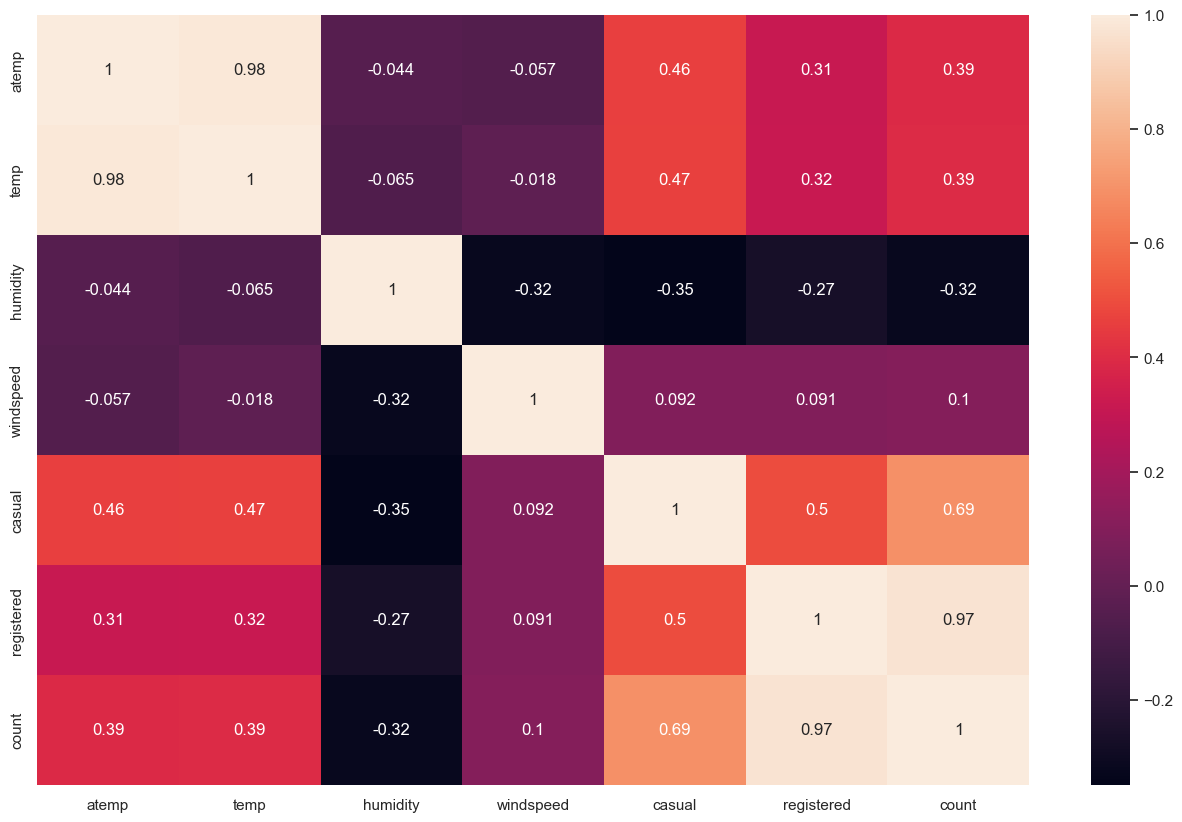

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix,annot = True)
plt.show()

Correlation Analysis

Atemp:

Strong positive correlation with 'temp' (0.98), indicating a close relationship.
Moderate positive correlation with 'casual' (0.46) and 'registered' (0.31).
Positive correlation with 'count' (0.39), suggesting a relationship with overall bike rentals.

Temp (Temperature):

Highly correlated with 'atemp' (0.98), indicating a strong connection.
Moderate positive correlation with 'casual' (0.47) and 'registered' (0.32).
Positive correlation with 'count' (0.39), showing a relationship with overall bike rentals.

Humidity:

Weak negative correlation with 'atemp' (-0.04) and 'temp' (-0.06).
Moderate negative correlation with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32).
Indicates a tendency for fewer bike rentals during higher humidity.

Windspeed:

Weak negative correlation with 'atemp' (-0.06) and 'temp' (-0.02).
Weak positive correlation with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10).
Suggests a subtle influence on bike rentals with increasing wind speed.

Casual (Casual Bike Rentals):

Strong positive correlation with 'atemp' (0.46) and 'temp' (0.47).
Moderate negative correlation with 'humidity' (-0.35) and positive correlation with 'windspeed' (0.09).
Highly correlated with 'registered' (0.50) and 'count' (0.69), indicating a significant impact on overall rentals.

Registered (Registered Bike Rentals):

Positive correlation with 'atemp' (0.31) and 'temp' (0.32).
Negative correlation with 'humidity' (-0.27) and positive correlation with 'windspeed' (0.09).
Highly correlated with 'casual' (0.50) and 'count' (0.97), emphasizing a substantial impact on overall rentals.

Count (Total Bike Rentals):

Positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
Negative correlation with 'humidity' (-0.32).
Highly correlated with 'registered' (0.97), emphasizing the joint impact of casual and registered rentals on the overall count.

In [32]:
# count of records based on months 

monthly_count = df_yulu.groupby('month')['count'].sum().reset_index()

counts = monthly_count.sort_values(by='count',ascending= False)

counts

,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


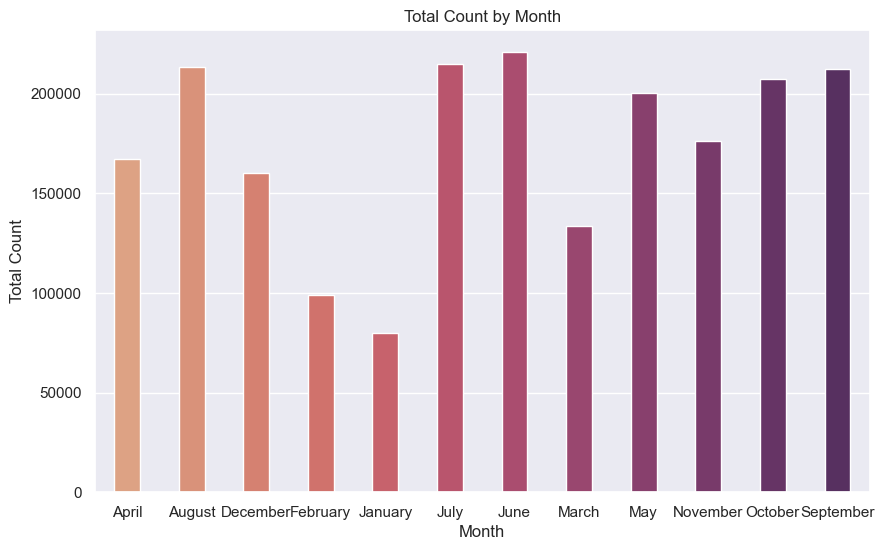

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='month',y='count',data = counts , palette = 'flare', width = 0.4)
plt.title('Total Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.show()

Monthly analysis on rentals

Peak Rental Months:

June stands out as the peak month for bike rentals, with the highest count of 220,733, followed closely by July and August.

Seasonal Trend:

Summer months (June, July, August) show higher bike rental counts, consistent with favorable weather conditions.

Off-Peak Rental Months:

January, February, and March have notably lower bike rental counts, indicating potential off-peak periods, possibly influenced by colder weather or fewer outdoor activities.

#### Set up Null hypothesis (H0) & Alternative hypothesis (Ha):

H0 : Average number of bikes rentals on the working day is same as the average number of bike rentals on the non-working day 

Ha : Average number of bike rentals on the working day is greater than the average number of bike rentals on the non-working day

#### T-test independent :

Extract sample data from the data frame 

In [38]:
df_yulu

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,Spring,No,No,1,9.84,14.395,81,0.0000,3,13,16,2011,January,1,0
1,2011-01-01 01:00:00,Spring,No,No,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,1
2,2011-01-01 02:00:00,Spring,No,No,1,9.02,13.635,80,0.0000,5,27,32,2011,January,1,2
3,2011-01-01 03:00:00,Spring,No,No,1,9.84,14.395,75,0.0000,3,10,13,2011,January,1,3
4,2011-01-01 04:00:00,Spring,No,No,1,9.84,14.395,75,0.0000,0,1,1,2011,January,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,No,Yes,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,19
10882,2012-12-19 20:00:00,Winter,No,Yes,1,14.76,17.425,57,15.0013,10,231,241,2012,December,19,20
10883,2012-12-19 21:00:00,Winter,No,Yes,1,13.94,15.910,61,15.0013,4,164,168,2012,December,19,21
10884,2012-12-19 22:00:00,Winter,No,Yes,1,13.94,17.425,61,6.0032,12,117,129,2012,December,19,22


In [45]:
working_day = df_yulu[df_yulu['workingday'] == 'No']['count'].sample(3000)

non_working_day = df_yulu[df_yulu['workingday'] == 'Yes']['count'].sample(3000)

t_stat , p_value = spy.ttest_ind(working_day,non_working_day,alternative ='greater')
                          

In [46]:
alpha = 0.05
print('alpha :', alpha)
print('p_value :', p_value)

if p_value < alpha:
    print('Result : we reject null hypothesis')
    print('Average number of bike rentals on the working day is greater than the average number of bike rentals on the non-working day'
          )
else :
    print ('Result : Failed to reject null hypothesis')
    print('Average number of bikes rentals on the working day is same as the average number of bike rentals on the non-working day ')

alpha : 0.05
p_value : 0.6683842811003926
Result : Failed to reject null hypothesis
Average number of bikes rentals on the working day is same as the average number of bike rentals on the non-working day 


####  Effect of season on bike rentals 

In [42]:
# check sample size of seasons 

df_yulu['season'].value_counts()

season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64

##### Set up the Null hypothesis and Alternate hypothesis 

In [47]:
H0 = 'Average number of bikes rented is same for all the seasons'

Ha = 'Average number of bikes rented is not same for all the seasons'


##### One-way ANOVA Test

To compare the means of 4 independent groups, the ANOVA test is selected

Assumption of ANOVA:
1. Data should follow a Gaussian distribution 
2. Independent groups 
3. Equal variance in all the groups 

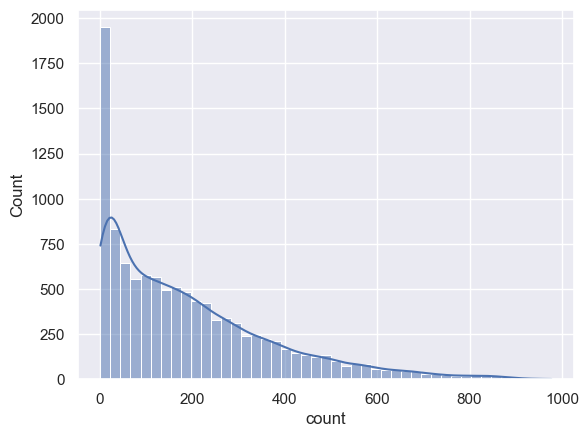

In [49]:
# 1. check the nornaliry for the data 
sns.histplot(x=df_yulu['count'],kde=True)

plt.show()


1. From the Plot it is clear that the data is not a normal distribution 

2. Independent groups - this condition is already satisified since all seasons are independent of each other 

3. check if all groups have same variance : For this, levene test is used.

In [51]:

H0 = 'Variance is same for all seasons'
Ha = 'Variance is not same for all seasons'


spring = df_yulu[df_yulu['season'] == 'Spring']['count']
summer = df_yulu[df_yulu['season'] == 'Summer']['count']
fall = df_yulu[df_yulu['season'] == 'Fall']['count']
winter = df_yulu[df_yulu['season'] == 'Winter']['count']

levene_stat, p_val = spy.levene(spring,summer,fall,winter)

if p_val < alpha:
    print('Result : we reject null hypothesis')
    print(Ha)
else :
    print ('Result : Failed to reject null hypothesis')
    print(H0)


Result : we reject null hypothesis
Variance is not same for all seasons


This data is not suitable to perform a ANOVA test since the first and third assumptions are not met.
Since ANOVA is failed, let's try kruskal test

In [52]:
H0 = 'Average number of biles rented is same for all the seasons'
Ha = 'Average number of biles rented is different for different seasons'

t_stat, p_val = spy.kruskal(spring,summer,fall,winter)

if p_val < alpha:
    print('Result : we reject null hypothesis')
    print(Ha)
else :
    print ('Result : Failed to reject null hypothesis')
    print(H0)

Result : we reject null hypothesis
Average number of biles rented is different for different seasons


The average number of rentals is different for different seasons

####  Is weather and Season dependent ?


CHi2_Contingency Test:

To check if there is a significant relationship between 2 categorical variable,
chi square test of independence can be used 

In [56]:
H0 = 'Weather and Season are independent'
Ha = 'Weather and Season are dependent'

ws = pd.crosstab(df_yulu['weather'],df_yulu['season'])
p_value = spy.chi2_contingency(ws).pvalue
if p_value < alpha:
    print('Result : we reject null hypothesis')
    print(Ha)
else :
    print ('Result : Failed to reject null hypothesis')
    print(H0)

Result : we reject null hypothesis
Weather and Season are dependent


it appears that our intuition about the dependency between weather season is statistically significant 

##### Conclusion:

T-test of independence: To determine if there is a significant difference bewteen 2 sample groups (higher or lower or not equal)

Result: There is no statistically significant difference on average number of rentals between working day and non-working day

ANOVA Test: To compare means of 3 or more groups to understand if at least one group mean is significantly different from the others.

Result: Failed to satisfy the assumptions of ANOVA test but got the approximate results using Kruskal test.

Chi-Square Test of Independence: To check if there is a significant relationship between 2 categorical variables

Result: Weather and Season are significantly dependent



##### Strategic Recommendations for Yulu's Profitable Growth

##### Optimize Bike Distribution in Peak Months:

Concentrate bike deployment efforts during peak months, especially in June, July, and August, to meet increased demand and capitalize on favorable weather conditions.

##### Seasonal Marketing Strategies:

Tailor marketing efforts to leverage the seasonal trend, promoting Yulu's services more aggressively during summer months to attract a larger user base.

##### Optimize Bike Deployment on Working Days:

Given the lack of significant differences in bike rentals between working and non-working days, consider adjusting bike deployment strategies to ensure optimal resource allocation throughout the week.

##### Adapt to Different Weather Conditions:

Change promotions or discounts based on the weather. If it's rainy, for example, offer special deals to encourage more people to use the bikes.

##### Promote Bikes Differently in Each Season:

Advertise the bikes differently in each season. For example, highlight summer promotions in June, July, and August when more people want to ride bikes.

##### Combine Season and Weather Plans:

Plan bike availability based on both the season and the weather to make sure people have the bikes they need when they want them. For example, have more bikes available on sunny days in the summer.